In [143]:
# Import necessary libraries 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math
import warnings

# Style pyplot with serif font
plt.rcParams['font.family'] = 'serif'

# 3D plotting library
from mpl_toolkits.mplot3d import Axes3D

# Uncomment the next line if you do not have cufflinks and plotly installed
!pip install cufflinks plotly

import cufflinks as cf 
import plotly.offline as plyo

# Initialize plotly to work in offline mode
plyo.init_notebook_mode(connected=True)

# Optional: if you are using Jupyter Notebook, you might want to enable inline plotting
cf.go_offline()

# Finally install Yahoo Finance library and import it
!pip install yfinance
import yfinance as yf

## Load the data

In [70]:
# Lista de activos
assets = [
    "^GSPC",  # S&P 500
    "^GDAXI",  # DAX Index
    "000300.SS",  # SHSZ300 Index
    "^MXX",  # MXLA Index
    "CL=F",  # Petróleo (US Crude)
    "GC=F",  # Oro
    "HG=F",  # Cobre
    "BTC-USD",  # Bitcoin
    "GBPUSD=X",  # Libra esterlina
    "EURUSD=X"  # Euro
]

# Descargar los precios históricos
start_date = "2019-9-28"
end_date = "2024-9-28"

data = {}
for asset in assets:
    ticker = yf.Ticker(asset)
    data[asset] = ticker.history(start=start_date, end=end_date)

# Crear un DataFrame para cada activo y mostrarlos
for asset, df in data.items():
    print(f"Historical Prices for {asset}:")
    print(df[['Open', 'High', 'Low', 'Close']], "\n")

Historical Prices for ^GSPC:
                                  Open         High          Low        Close
Date                                                                         
2019-09-30 00:00:00-04:00  2967.070068  2983.850098  2967.070068  2976.739990
2019-10-01 00:00:00-04:00  2983.689941  2992.530029  2938.699951  2940.250000
2019-10-02 00:00:00-04:00  2924.780029  2924.780029  2874.929932  2887.610107
2019-10-03 00:00:00-04:00  2885.379883  2911.129883  2855.939941  2910.629883
2019-10-04 00:00:00-04:00  2918.560059  2953.739990  2918.560059  2952.010010
...                                ...          ...          ...          ...
2024-09-23 00:00:00-04:00  5711.899902  5725.359863  5704.220215  5718.569824
2024-09-24 00:00:00-04:00  5727.660156  5735.319824  5698.990234  5732.930176
2024-09-25 00:00:00-04:00  5733.649902  5741.029785  5712.060059  5722.259766
2024-09-26 00:00:00-04:00  5762.220215  5767.370117  5721.009766  5745.370117
2024-09-27 00:00:00-04:00  5755.359

In [72]:
# Inicializar un DataFrame vacío para los precios de cierre
close_prices = pd.DataFrame()

for asset in assets:
    ticker = yf.Ticker(asset)
    df = ticker.history(start=start_date, end=end_date)
    close_prices[asset] = df["Close"]

# Mostrar el DataFrame consolidado de precios de cierre
print(close_prices.head())

                                 ^GSPC  ^GDAXI  000300.SS  ^MXX       CL=F  \
Date                                                                         
2019-09-30 00:00:00-04:00  2976.739990     NaN        NaN   NaN  54.070000   
2019-10-01 00:00:00-04:00  2940.250000     NaN        NaN   NaN  53.619999   
2019-10-02 00:00:00-04:00  2887.610107     NaN        NaN   NaN  52.639999   
2019-10-03 00:00:00-04:00  2910.629883     NaN        NaN   NaN  52.450001   
2019-10-04 00:00:00-04:00  2952.010010     NaN        NaN   NaN  52.810001   

                                  GC=F    HG=F  BTC-USD  GBPUSD=X  EURUSD=X  
Date                                                                         
2019-09-30 00:00:00-04:00  1465.699951  2.5645      NaN       NaN       NaN  
2019-10-01 00:00:00-04:00  1482.000000  2.5520      NaN       NaN       NaN  
2019-10-02 00:00:00-04:00  1501.000000  2.5615      NaN       NaN       NaN  
2019-10-03 00:00:00-04:00  1507.099976  2.5455      NaN       N

In [74]:
# Inicializar un DataFrame vacío para los precios de cierre
close_prices = pd.DataFrame()

for asset in assets:
    ticker = yf.Ticker(asset)
    df = ticker.history(start=start_date, end=end_date)
    df.index = df.index.date  # Convertir los índices a fecha sin hora
    close_prices[asset] = df["Close"]

close_prices.index = pd.to_datetime(close_prices.index)  # Convertir el índice a datetime
close_prices = close_prices.groupby(close_prices.index).first()  # Alinear todos los activos al mismo índice

# Cambiar el nombre de las columnas
close_prices.columns = [
    "S&P 500", 
    "DAX",
    "SHSZ300",
    "MXLA Index",
    "US Crude",
    "Gold",
    "Copper",
    "Bitcoin",
    "GBP/USD",
    "EUR/USD"
]

# Mostrar el DataFrame consolidado de precios de cierre
display(close_prices.head())

,S&P 500,DAX,SHSZ300,MXLA Index,US Crude,Gold,Copper,Bitcoin,GBP/USD,EUR/USD
2019-09-30,2976.739990,12428.080078,NaN,43011.269531,54.070000,1465.699951,2.5645,8293.868164,1.229317,1.094271
2019-10-01,2940.250000,12263.830078,NaN,42937.160156,53.619999,1482.000000,2.5520,8343.276367,1.228999,1.089966
2019-10-02,2887.610107,11925.250000,NaN,42222.898438,52.639999,1501.000000,2.5615,8393.041992,1.229226,1.093494
2019-10-03,2910.629883,NaN,NaN,42443.308594,52.450001,1507.099976,2.5455,8259.992188,1.230436,1.096371
2019-10-04,2952.010010,12012.809570,NaN,43416.898438,52.810001,1506.199951,2.5555,8205.939453,1.234233,1.097538


## Análisis Preliminar

### Data Histórica y Estadísticas

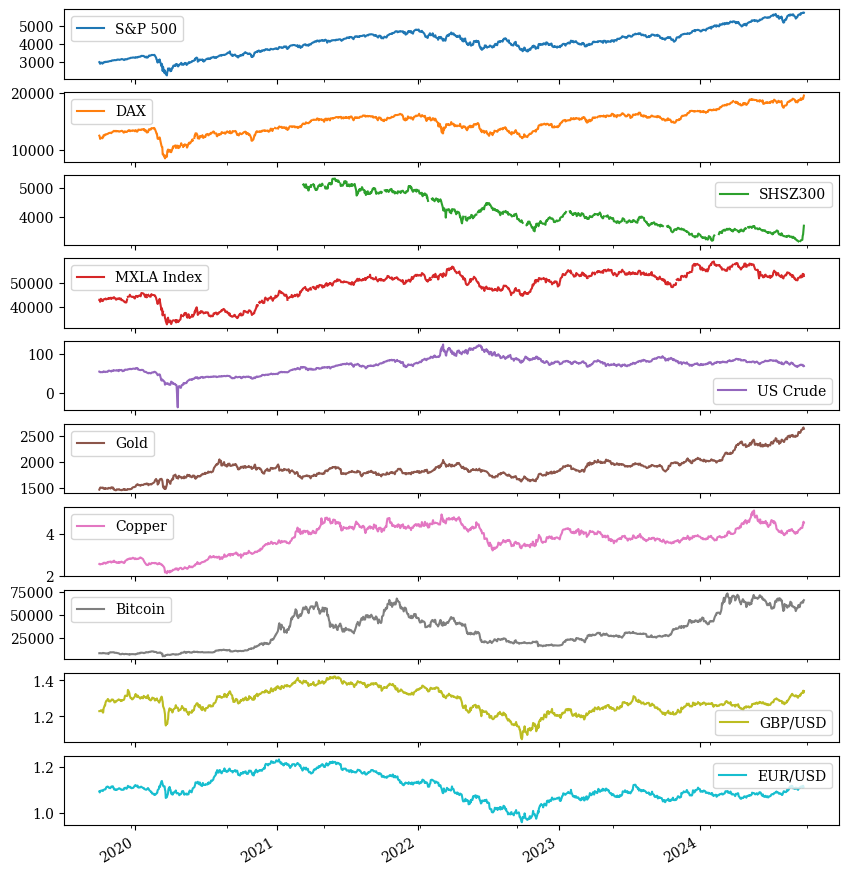

In [78]:
# Ver rápidamente la evolución de los activos
close_prices.plot(figsize=(10, 12), subplots=True)
plt.savefig('Historical Prices.png')

In [115]:
# Debido a la falta de data del índice SHSZ300 lo quitamos
close_prices = close_prices.drop("SHSZ300", axis=1)

In [117]:
# Matriz de retornos
returns = close_prices.pct_change(fill_method=None).round(2)
display(returns.head())

# Retorno diario promedio (1Y)
returns.mean()

,S&P 500,DAX,MXLA Index,US Crude,Gold,Copper,Bitcoin,GBP/USD,EUR/USD
2019-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-01,-0.01,-0.01,-0.00,-0.01,0.01,-0.00,0.01,-0.0,-0.0
2019-10-02,-0.02,-0.03,-0.02,-0.02,0.01,0.00,0.01,0.0,0.0
2019-10-03,0.01,NaN,0.01,-0.00,0.00,-0.01,-0.02,0.0,0.0
2019-10-04,0.01,NaN,0.02,0.01,-0.00,0.00,-0.01,0.0,0.0


S&P 500       0.000517
DAX           0.000524
MXLA Index    0.000135
US Crude     -0.002259
Gold          0.000485
Copper        0.000549
Bitcoin       0.002593
GBP/USD       0.000119
EUR/USD      -0.000024
dtype: float64

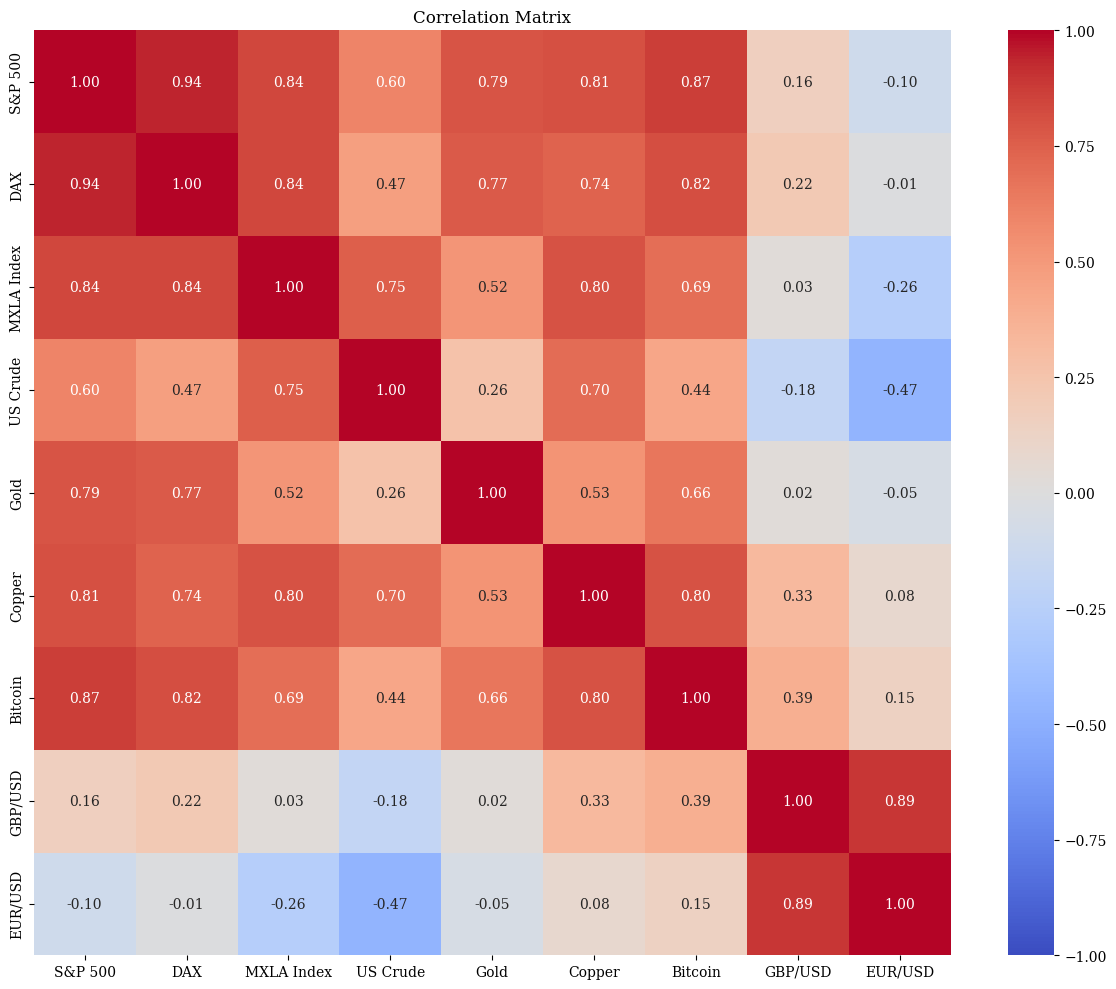

In [119]:
# Calcula la matriz de correlación
corr_matrix = close_prices.corr()

# Crear un mapa de calor para la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.tight_layout()

# Guardar la imagen antes de mostrarla
plt.savefig('Matrix.png')

# Mostrar imagen
plt.show()

### Análisis Macroeconómico

In [122]:
# Instalar e importar librería para el API del FRED
!pip install fredapi
from fredapi import Fred

In [124]:
# Configura tu clave API aquí
fred = Fred(api_key='da5ccfc0f619966ef74037a790c22f49')

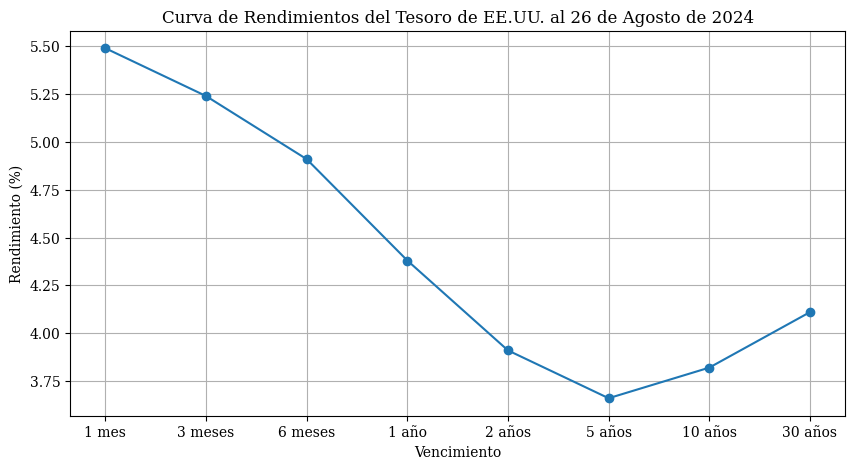

In [126]:
# Identificadores de series para diferentes vencimientos de los bonos del Tesoro
series_ids = {
    '1 mes': 'DGS1MO',
    '3 meses': 'DGS3MO',
    '6 meses': 'DGS6MO',
    '1 año': 'DGS1',
    '2 años': 'DGS2',
    '5 años': 'DGS5',
    '10 años': 'DGS10',
    '30 años': 'DGS30'
}

# Fecha específica para la cual quieres los datos
date = '2024-08-26'

# Crear un DataFrame para almacenar las tasas
yield_data = pd.DataFrame(index=series_ids.keys())

# Obtener datos para cada serie
for term, series_id in series_ids.items():
    data = fred.get_series(series_id, observation_start=date, observation_end=date)
    if not data.empty:
        yield_data.loc[term, 'Yield'] = data.iloc[-1]

# Ordenar el DataFrame por el vencimiento de los bonos (de forma manual)
sort_order = ['1 mes', '3 meses', '6 meses', '1 año', '2 años', '5 años', '10 años', '30 años']
yield_data = yield_data.loc[sort_order]

# Graficar la curva de rendimientos
plt.figure(figsize=(10, 5))
plt.plot(yield_data.index, yield_data['Yield'], marker='o')
plt.title('Curva de Rendimientos del Tesoro de EE.UU. al 26 de Agosto de 2024')
plt.xlabel('Vencimiento')
plt.ylabel('Rendimiento (%)')
plt.grid(True)
plt.savefig('Yield Curve.png')
plt.show()

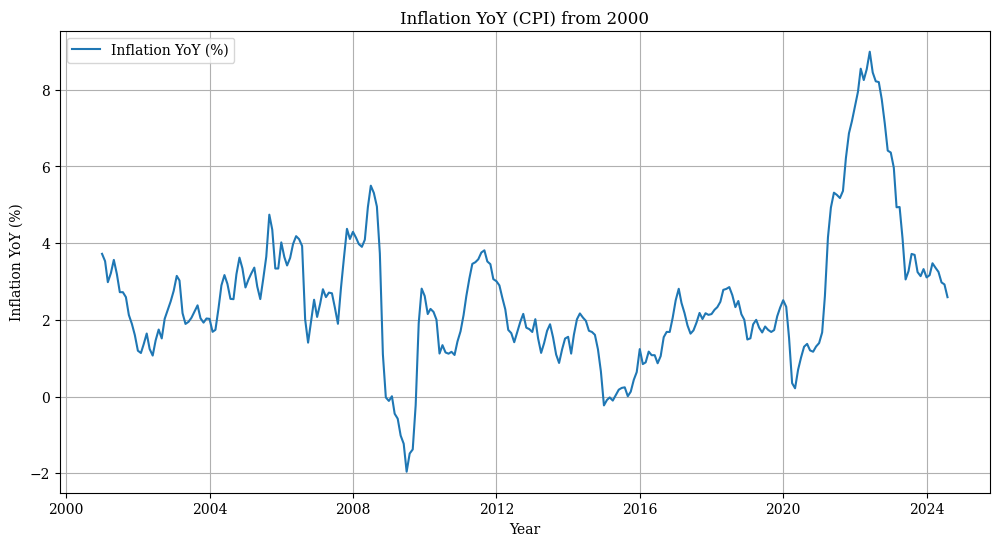

In [127]:
# Identificador de la serie para la inflación YoY (CPI)
series_id = 'CPIAUCSL'

# Obtener datos de la serie deseada
inflation_data = fred.get_series(series_id, observation_start='2000-01-01')

# Calcular la inflación YoY
inflation_yoy = inflation_data.pct_change(periods=12) * 100  # Multiplicar por 100 para obtener porcentajes

# Crear un DataFrame
inflation_df = pd.DataFrame({'Date': inflation_yoy.index, 'Inflation YoY (%)': inflation_yoy}).dropna()

# Graficar la inflación YoY
plt.figure(figsize=(12, 6))
plt.plot(inflation_df['Date'], inflation_df['Inflation YoY (%)'], label='Inflation YoY (%)')
plt.title('Inflation YoY (CPI) from 2000')
plt.xlabel('Year')
plt.ylabel('Inflation YoY (%)')
plt.grid(True)
plt.legend()
plt.savefig('InflationUS.png')
plt.show()

### Análisis Técnico

In [131]:
# Instalar e importar librería para análisis técnico
!pip install ta
import ta

In [133]:
# Categorizar los activos
currencies = ['GBP/USD', 'EUR/USD', 'Bitcoin']
indices = ['S&P 500', 'DAX']
commodities = ['Gold', 'Copper', 'US Crude']

In [135]:
# Función para calcular RSI y MAs, y graficarlos
def plot_indices_technical_analysis(df, asset):
    # Preparar datos
    df = df[[asset]].dropna()
    df['close'] = df[asset]

    # Calcular RSI
    df['rsi'] = ta.momentum.rsi(df['close'], window=14)
    
    # Calcular medias móviles
    df['sma_small'] = df['close'].rolling(window=14).mean()
    df['sma_big'] = df['close'].rolling(window=50).mean()

    # Graficar RSI
    plt.figure(figsize=(10, 4))
    plt.plot(df['rsi'], label='RSI', color='purple')
    plt.axhline(70, linestyle='--', color='red', alpha=0.5)
    plt.axhline(30, linestyle='--', color='green', alpha=0.5)
    plt.title(f'RSI for {asset}')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.legend()
    plt.savefig(f'RSI {asset}.png')
    plt.show()

    # Graficar Medias Móviles
    plt.figure(figsize=(10, 4))
    plt.plot(df['close'], label='Close', color='blue')
    plt.plot(df['sma_small'], label='14-Day SMA', color='orange')
    plt.plot(df['sma_big'], label='50-Day SMA', color='green')
    plt.title(f'Moving Averages for {asset}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.savefig(f'MAs {asset}.png')
    plt.show()

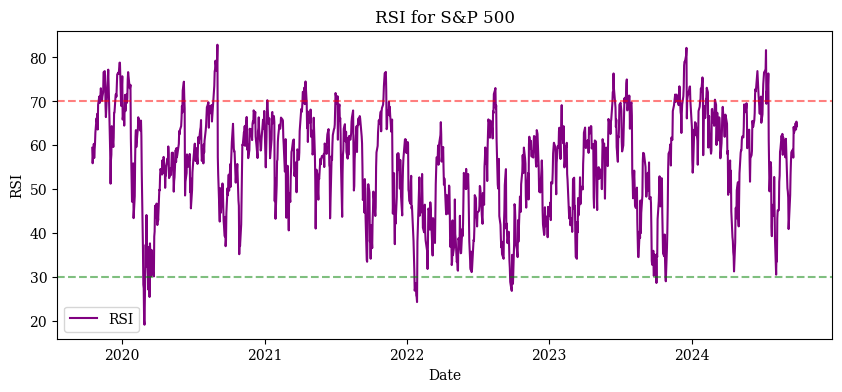

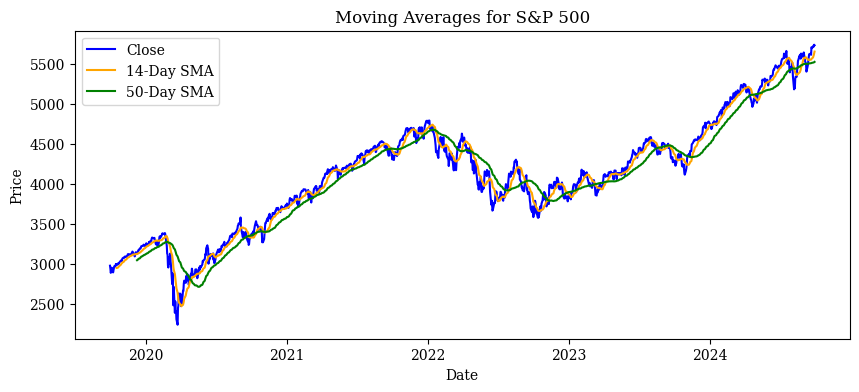

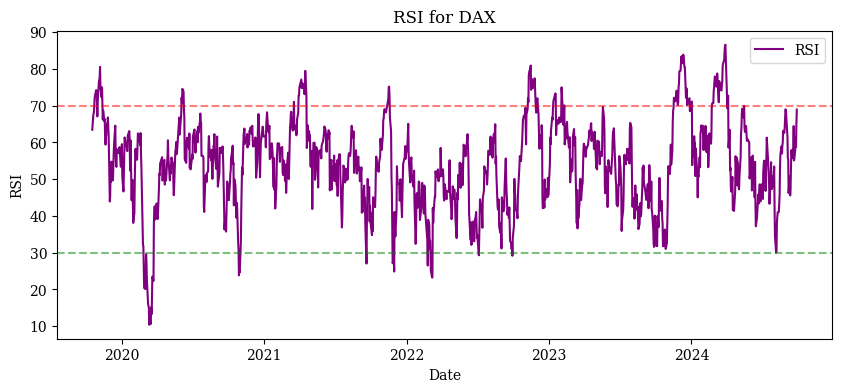

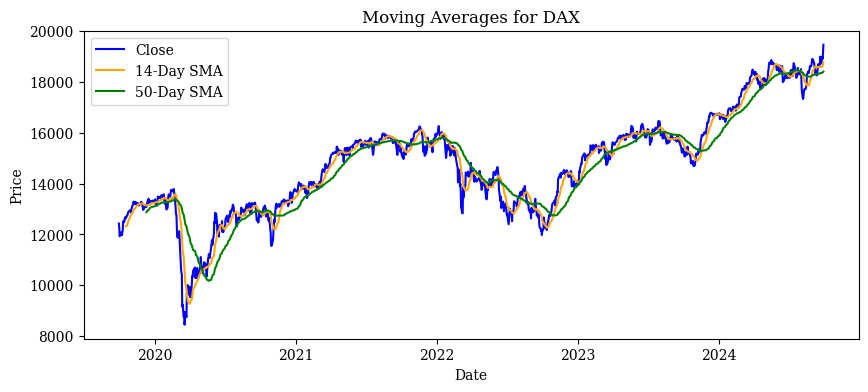

In [137]:
# Aplicar la función a cada índice
for index in indices:
    plot_indices_technical_analysis(close_prices, index)

## Optimización

### Optimización Media-Varianza

In [157]:
# Definir el número de activos
noa = 9

# Calcular retornos logarítmicos
log_returns = np.log(close_prices / close_prices.shift(1))
display(log_returns.head())

C:\Users\Franc\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning:

invalid value encountered in log



,S&P 500,DAX,MXLA Index,US Crude,Gold,Copper,Bitcoin,GBP/USD,EUR/USD
2019-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-01,-0.012334,-0.013304,-0.001725,-0.008357,0.011060,-0.004886,0.005940,-0.000258,-0.003943
2019-10-02,-0.018065,-0.027996,-0.016775,-0.018446,0.012739,0.003716,0.005947,0.000184,0.003232
2019-10-03,0.007940,NaN,0.005207,-0.003616,0.004056,-0.006266,-0.015979,0.000984,0.002628
2019-10-04,0.014117,NaN,0.022679,0.006840,-0.000597,0.003921,-0.006565,0.003081,0.001064


In [159]:
# Iniciar con pesos aleatorios
weights = np.random.random(noa)

# Normalizar pesos
weights /= np.sum(weights)
display(weights)

array([0.0877098 , 0.1745448 , 0.1393239 , 0.10992519, 0.10592099,
       0.17483102, 0.13631639, 0.04746229, 0.02396562])

In [161]:
# Retorno esperado (anualizado)
np.sum(log_returns.mean() * weights) * 252

0.13636613944755951

In [165]:
# Varianza del portafolio (anualizada)
math.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))

0.17683089228444834

In [173]:
# Ahora implementamos una simulación de Monte Carlo para obtener distintas combinaciones de los pesos y las estadísticas de cada combinación

# Función para calcular el retorno
def port_ret(weights):
 return np.sum(log_returns.mean() * weights) * 252

# Función para calcular la varianza
def port_vol(weights):
 return np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))

In [176]:
prets = []
pvols = []

# Simulación de Monte Carlo
for p in range (80000):
 weights = np.random.random(noa)
 weights /= np.sum(weights)
 # Collects the resulting statistics in list objects
 prets.append(port_ret(weights))
 pvols.append(port_vol(weights))
prets = np.array(prets)
pvols = np.array(pvols)

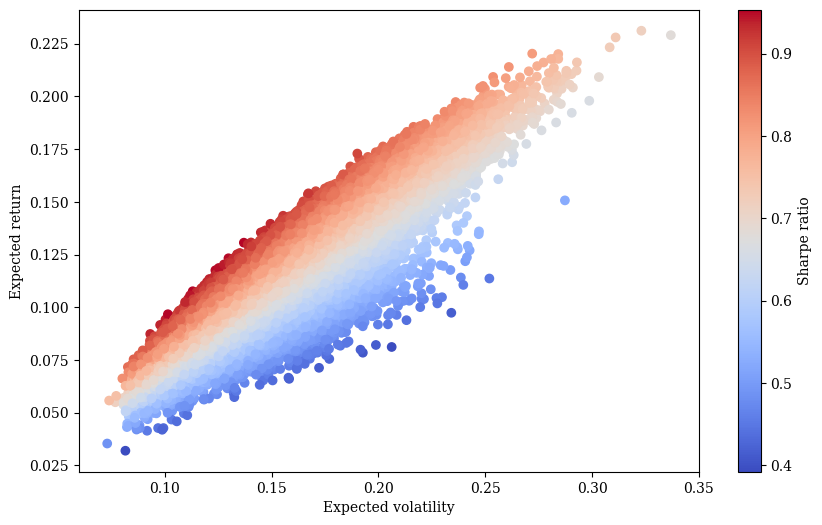

In [178]:
# Plot simulation results
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,marker='o', cmap='coolwarm')
plt.xlabel('Expected volatility')
plt.ylabel('Expected return')
plt.colorbar(label='Sharpe ratio')

In [180]:
# Importar librería para optimizar
import scipy.optimize as sco

In [184]:
# Minimizar el negativo del ratio de Sharpe es lo mismo a maximizar el ratio de Sharpe

# Función a minimizar
def min_func_sharpe(weights):
 return -port_ret(weights) / port_vol(weights)

# Restricción (suma de los pesos debe ser igual a 1)
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Límites para los pesos
bnds = tuple((0, 1) for x in range(noa))

# Vector de pesos (iguales)
eweights = np.array(noa * [1. / noa,])
eweights

array([0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111])

In [186]:
# Maximizar el ratio de Sharpe
min_func_sharpe(eweights)

-0.7874461979852025

In [192]:
# Optimizar
opts = sco.minimize(min_func_sharpe, eweights,
                     method='SLSQP', bounds=bnds,
                     constraints=cons)

# Pesos del portafolio óptimo (con el máximo ratio de Sharpe)
opts['x'].round(3)

array([0.189, 0.   , 0.   , 0.019, 0.444, 0.066, 0.074, 0.207, 0.   ])

In [194]:
# Ahora, hallamos el portafolio de mínima varianza
optv = sco.minimize(port_vol, eweights,
                    method='SLSQP', bounds=bnds,
                    constraints=cons)

# Pesos del portafolio de mínima varianza con el mayor retorno
optv['x'].round(3)

array([0.005, 0.039, 0.099, 0.003, 0.115, 0.   , 0.   , 0.095, 0.643])

In [202]:
# Construir frontera eficiente
# Restricciones
cons = ({'type': 'eq', 'fun': lambda x: port_ret(x) - tret},
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Límites para los pesos
bnds = tuple((0, 1) for x in weights)

# Iniciar lista de retornos y varianzas
trets = np.linspace(0.05, 0.3, 50)
tvols = []

# Minimización de la volatilidad para diferentes niveles de retorno
for tret in trets:
    res = sco.minimize(port_vol, eweights, method='SLSQP',
    bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

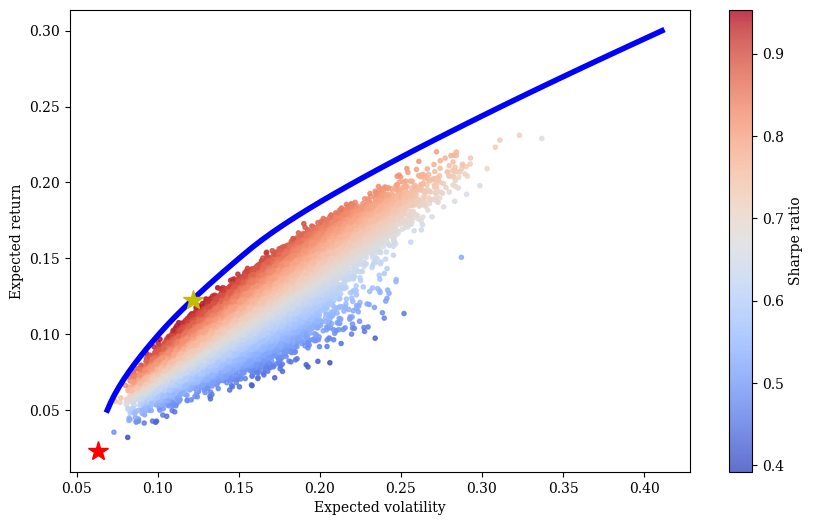

In [204]:
# Graficar la frontera eficiente (con el portafolio de máximo ratio de Sharpe y el portafolio mínima varianza)
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,
marker='.', alpha=0.8, cmap='coolwarm')
plt.plot(tvols, trets, 'b', lw=4.0)
plt.plot(port_vol(opts['x']), port_ret(opts['x']),'y*', markersize=15.0)
plt.plot(port_vol(optv['x']), port_ret(optv['x']),'r*', markersize=15.0)
plt.xlabel('Expected volatility')
plt.ylabel('Expected return')
plt.colorbar(label='Sharpe ratio')
plt.savefig('MV_Opt.png')